Cargue el dataset adult.csv y desarrolle un modelo predictivo Naive Bayes considerando los siguientes puntos:

1.  Importar datos

In [22]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score


# Definimos la ruta de los datos
ruta_adult = './datos/adult.csv'

# Cargamos los datos
adult = pd.read_csv(ruta_adult)

# Mostramos las primeras filas del dataframe
print(adult.head())

#mostrar las columnas
print(adult.columns)


   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

2.  Análisis Exploratorio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
age                0
workclass          0
fnlwgt             0
educatio

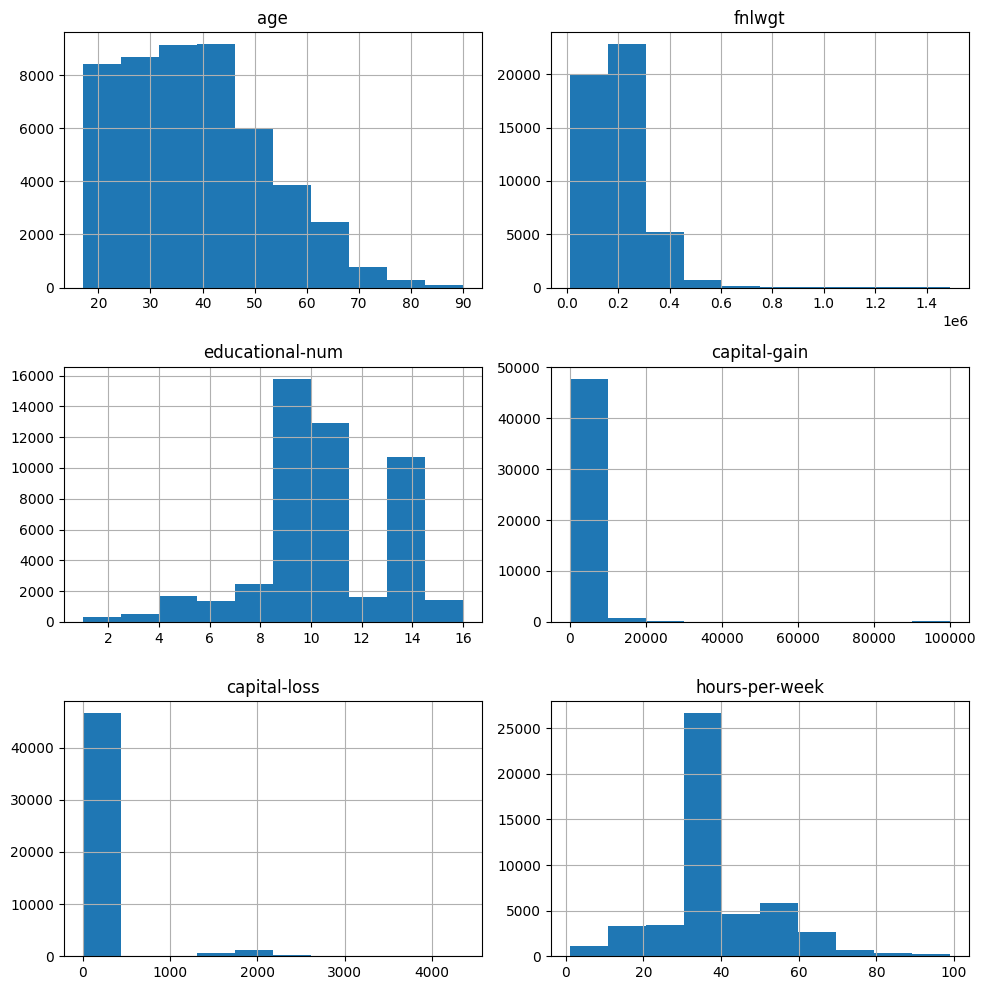

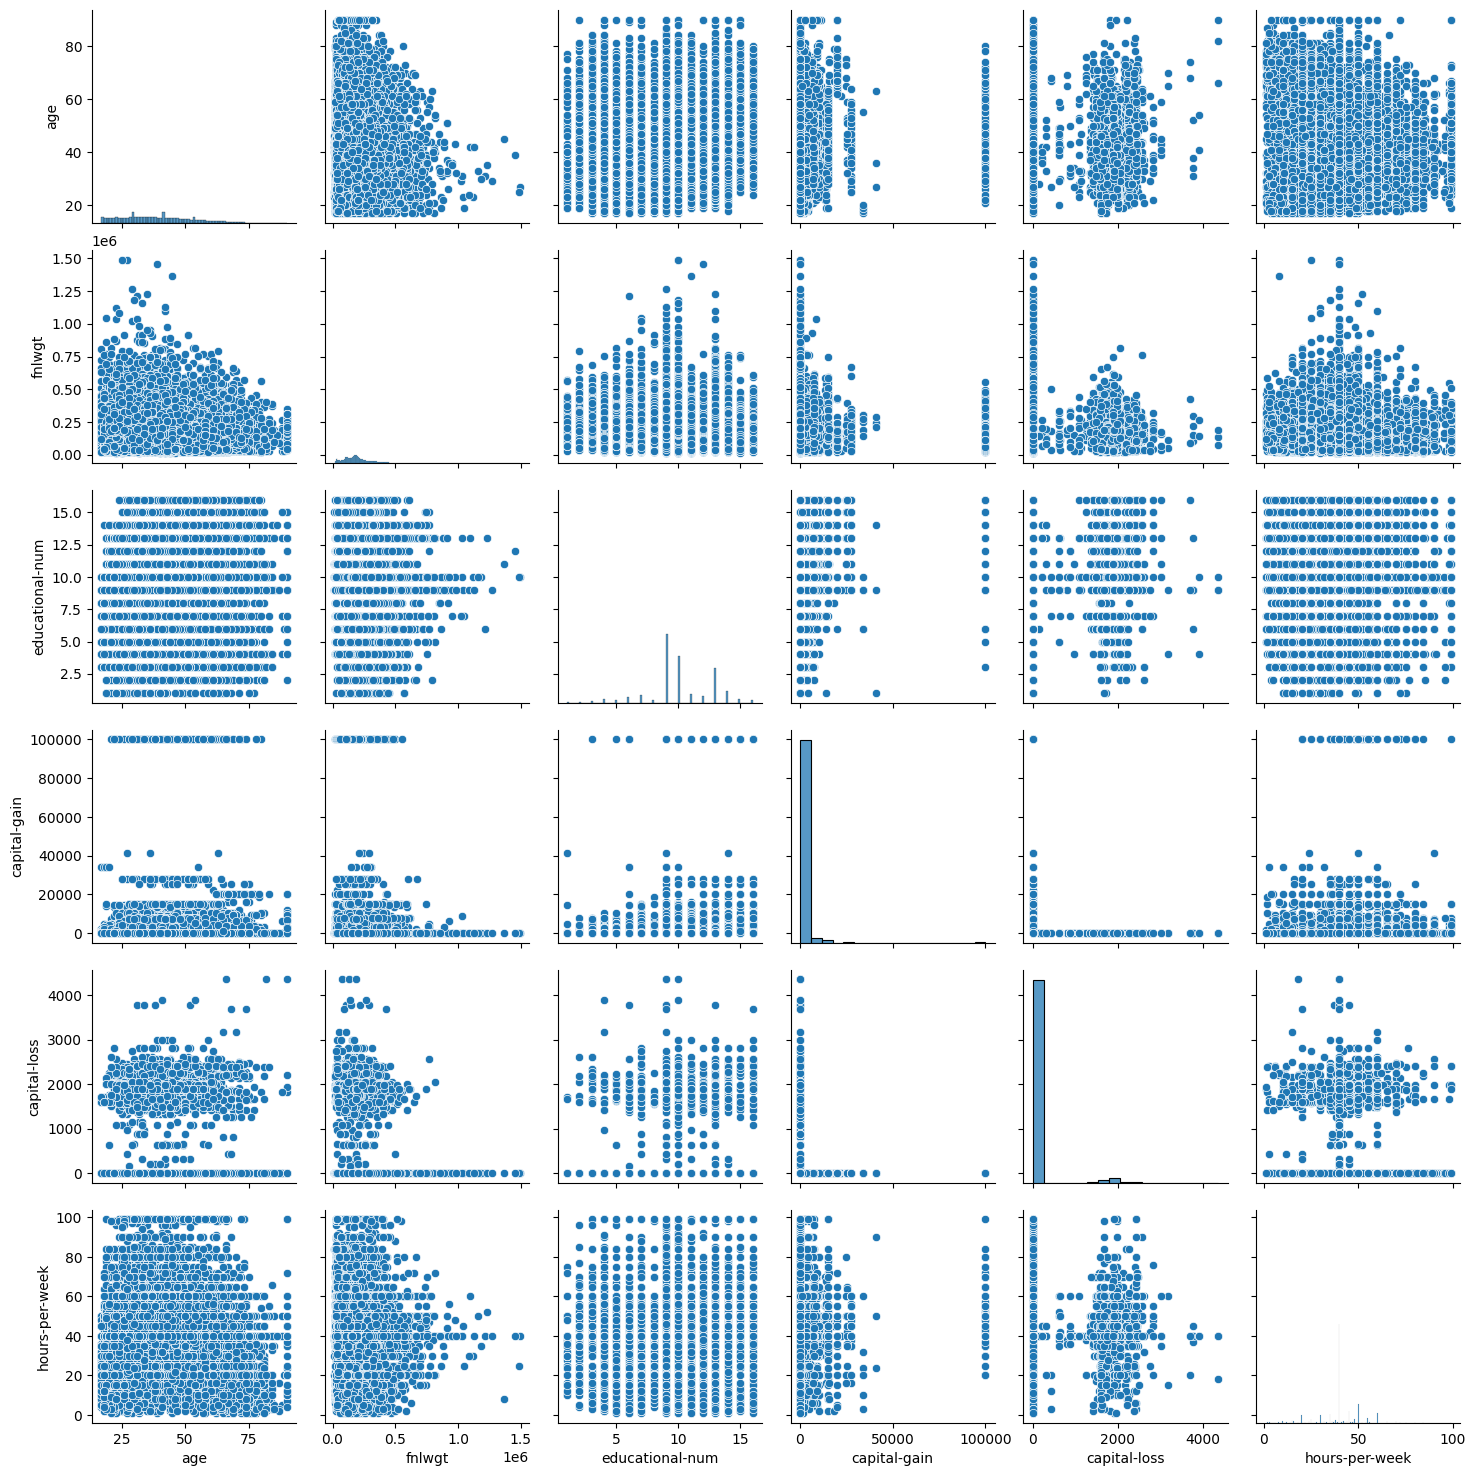

In [5]:


# 1. Información básica sobre el DataFrame
print(adult.info())

# 2. Verificar si hay valores nulos
print(adult.isnull().sum())

# 3. Estadísticas descriptivas de las columnas numéricas
print(adult.describe())

# 4. Visualizar la distribución de las columnas numéricas
adult.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

# 5. Analizar las relaciones entre las columnas numéricas
sns.pairplot(adult)
plt.show()



3.  Definición de features y target

In [6]:
# Definir las características
X = adult[['age','fnlwgt', 'educational-num', 'occupation', 'capital-gain', 'capital-loss']]

# Definir el objetivo
y = adult['income']

#mostrar todo
print(X)
print(y)


"""  # Definir las características
features = ['age', 'education', 'occupation']

# Definir la variable objetivo
target = 'income'

# Crear el DataFrame de características
X = adult[features]

# Crear la Serie de la variable objetivo
y = adult[target] """



       age  fnlwgt  educational-num         occupation  capital-gain  \
0       25  226802                7  Machine-op-inspct             0   
1       38   89814                9    Farming-fishing             0   
2       28  336951               12    Protective-serv             0   
3       44  160323               10  Machine-op-inspct          7688   
4       18  103497               10                  ?             0   
...    ...     ...              ...                ...           ...   
48837   27  257302               12       Tech-support             0   
48838   40  154374                9  Machine-op-inspct             0   
48839   58  151910                9       Adm-clerical             0   
48840   22  201490                9       Adm-clerical             0   
48841   52  287927                9    Exec-managerial         15024   

       capital-loss  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...

"  # Definir las características\nfeatures = ['age', 'education', 'occupation']\n\n# Definir la variable objetivo\ntarget = 'income'\n\n# Crear el DataFrame de características\nX = adult[features]\n\n# Crear la Serie de la variable objetivo\ny = adult[target] "

4.  Dividir datos en training y test

In [7]:

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)


X_train: (39073, 6)
X_test: (9769, 6)
y_train: (39073,)
y_test: (9769,)


5.  Feature Engineering

In [9]:

# Identificar las columnas numéricas en los datos
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Crear un discretizador con 10 bins y subsample=200000
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=200000)

# Ajustar el discretizador y transformar solo las características numéricas de los datos de entrenamiento
X_train_discrete = X_train.copy()
X_train_discrete[num_cols] = discretizer.fit_transform(X_train[num_cols])

# Transformar solo las características numéricas de los datos de prueba
X_test_discrete = X_test.copy()
X_test_discrete[num_cols] = discretizer.transform(X_test[num_cols])

# Mostrar los primeros registros de los datos de entrenamiento discretizados
print(X_train_discrete.head())

# Mostrar los primeros registros de los datos de prueba discretizados
print(X_test_discrete.head())

       age  fnlwgt  educational-num         occupation  capital-gain  \
37193  3.0     0.0              6.0  Machine-op-inspct           0.0   
31093  4.0     1.0              3.0       Craft-repair           0.0   
33814  2.0     1.0              5.0       Craft-repair           0.0   
14500  1.0     0.0              5.0       Adm-clerical           0.0   
23399  3.0     0.0              6.0   Transport-moving           0.0   

       capital-loss  
37193           0.0  
31093           0.0  
33814           0.0  
14500           0.0  
23399           0.0  
       age  fnlwgt  educational-num        occupation  capital-gain  \
7762   5.0     0.0              5.0     Other-service           0.0   
23881  1.0     0.0              5.0  Transport-moving           0.0   
30507  3.0     1.0              8.0    Prof-specialty           1.0   
28911  2.0     1.0              5.0  Transport-moving           0.0   
19484  3.0     1.0              8.0             Sales           0.0   

       c

6.  Escalamiento de features

In [11]:

# Crear un escalador
scaler = StandardScaler()

# Ajustar el escalador y transformar las características numéricas de los datos de entrenamiento
X_train_scaled = X_train.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transformar las características numéricas de los datos de prueba
X_test_scaled = X_test.copy()
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

# Mostrar los primeros registros de los datos de entrenamiento escalados
print(X_train_scaled.head())

# Mostrar los primeros registros de los datos de prueba escalados
print(X_test_scaled.head())

            age    fnlwgt  educational-num         occupation  capital-gain  \
37193  0.246123 -0.421839        -0.029836  Machine-op-inspct     -0.144456   
31093  0.974794 -0.138604        -1.585248       Craft-repair     -0.144456   
33814 -0.336813 -0.161041        -0.418689       Craft-repair     -0.144456   
14500 -0.774016 -0.605742        -0.418689       Adm-clerical     -0.144456   
23399  0.537592 -1.529544         0.359017   Transport-moving     -0.144456   

       capital-loss  
37193     -0.219726  
31093     -0.219726  
33814     -0.219726  
14500     -0.219726  
23399     -0.219726  
            age    fnlwgt  educational-num        occupation  capital-gain  \
7762   1.266263 -1.484991        -0.418689     Other-service     -0.144456   
23881 -0.992617 -0.728546        -0.418689  Transport-moving     -0.144456   
30507  0.318991 -0.181335         1.136723    Prof-specialty      1.785937   
28911 -0.482548 -0.027042        -0.418689  Transport-moving     -0.144456   
194

7.  Entrenamiento del modelo

In [12]:

# Crear un codificador one-hot
encoder = OneHotEncoder(handle_unknown='ignore')

# Ajustar el codificador y transformar los datos de entrenamiento
X_train_encoded = encoder.fit_transform(X_train_discrete)

# Transformar los datos de prueba
X_test_encoded = encoder.transform(X_test_discrete)

# Crear un clasificador Naive Bayes
clf = MultinomialNB()

# Entrenar el clasificador con los datos de entrenamiento codificados
clf.fit(X_train_encoded, y_train) 


MultinomialNB()

8.  Predicciones

In [13]:
# Hacer predicciones con los datos de prueba
y_pred = clf.predict(X_test_encoded)

# Mostrar las primeras predicciones
print(y_pred[:5])


['<=50K' '<=50K' '>50K' '<=50K' '>50K']


9.  Cálculo de exactitud

In [14]:

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'La precisión del modelo es: {accuracy}')

La precisión del modelo es: 0.8093970723717883


10.     Matriz de confusión

Matriz de confusión:
[[6738  741]
 [1121 1169]]


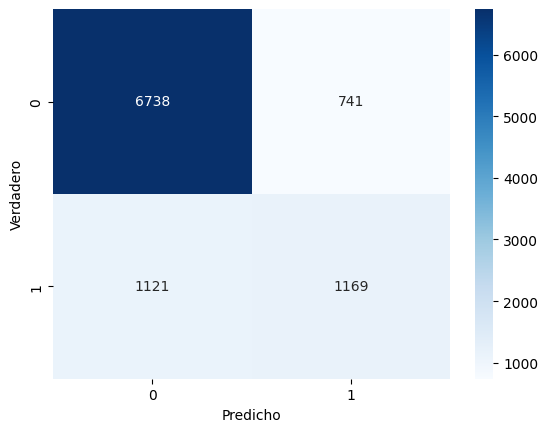

In [15]:

# Calcular la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

print('Matriz de confusión:')
print(conf_mat)

# Grafiaca de la matriz de confusión
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

11.     Otras medidas de evaluación

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calcular el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Precisión: 0.7998545133603475
Recall: 0.8093970723717883
F1-score: 0.8031356592691709


12.     Probabilidades de clases

In [17]:
# Obtener las probabilidades de pertenencia a cada clase
probabilidades = clf.predict_proba(X_test_encoded)

print('Probabilidades de pertenencia a cada clase:')
print(probabilidades)

Probabilidades de pertenencia a cada clase:
[[9.61878314e-01 3.81216861e-02]
 [9.37144830e-01 6.28551702e-02]
 [8.80536560e-04 9.99119463e-01]
 ...
 [5.23337759e-01 4.76662241e-01]
 [9.98080930e-01 1.91907030e-03]
 [1.95242292e-01 8.04757708e-01]]


13.     Curvas ROC –  AUC

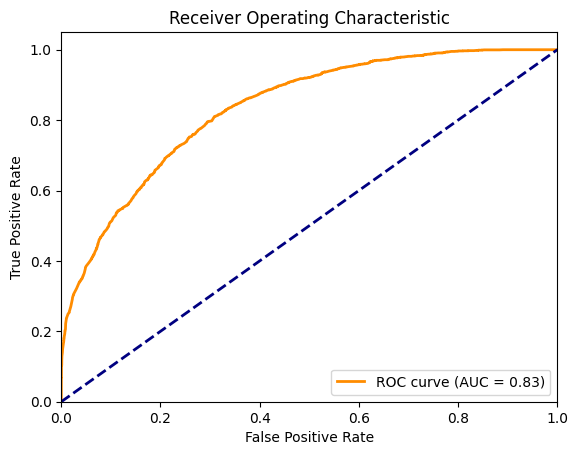

In [18]:

# Convertir las etiquetas en binarias
y_test_binary = (y_test == '>50K').astype(int)

# Calcular las tasas de verdaderos y falsos positivos
fpr, tpr, _ = roc_curve(y_test_binary, probabilidades[:, 1])

# Calcular el AUC
auc = roc_auc_score(y_test_binary, probabilidades[:, 1])

# El resto del código sigue igual...

# Crear una figura
plt.figure()

# Trazar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')

# Trazar la línea de no discriminación
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Definir los límites de los ejes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Agregar etiquetas y leyenda
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Mostrar la figura
plt.show()

El AUC es el área bajo la curva ROC.
Mide la capacidad global del modelo para distinguir entre clases positivas y negativas.
Un AUC cercano a 1 indica un modelo excelente, mientras que un AUC cercano a 0.5 sugiere un rendimiento aleatorio.
En este caso, el AUC es 0.83, lo que indica que el modelo tiene un buen nivel de precisión en sus predicciones. ¡Excelente trabajo en la evaluación del modelo!

14.     Validación cruzada k-fold

In [19]:

# Crear el codificador
encoder = OneHotEncoder()

# Ajustar y transformar los datos
X_encoded = encoder.fit_transform(X)

# Definir el número de pliegues para la validación cruzada
k = 5

# Ahora puedes usar X_encoded en cross_val_score
scores = cross_val_score(clf, X_encoded, y, cv=k)

print(f'Scores de validación cruzada: {scores}')
print(f'Promedio de scores: {scores.mean()}')

Scores de validación cruzada: [0.83990173 0.83867335 0.84234234 0.84531122 0.84469697]
Promedio de scores: 0.8421851233602693


14.     Validación cruzada k-fold

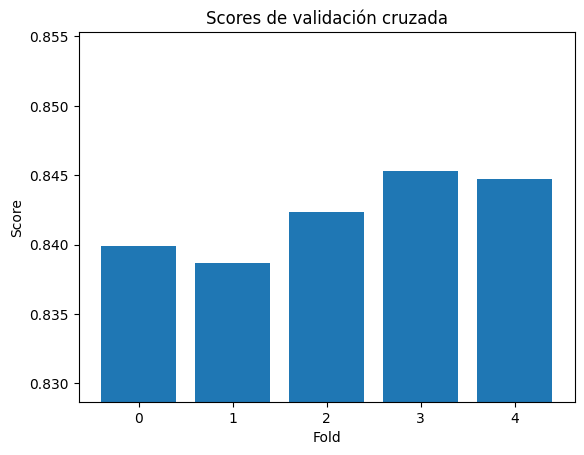

In [23]:

# Crear una figura
plt.figure()

# Crear un gráfico de barras con los scores de la validación cruzada
plt.bar(np.arange(k), scores)

# Agregar etiquetas a los ejes
plt.xlabel('Fold')
plt.ylabel('Score')

# Ajustar la escala del eje y para resaltar las diferencias
plt.ylim([scores.min() - 0.01, scores.max() + 0.01])

# Agregar un título
plt.title('Scores de validación cruzada')

# Mostrar la figura
plt.show()

Los resultados de evaluación del modelo son los siguientes:

Precisión: 0.80 (ponderada)
Recall: 0.81 (ponderado)
F1-score: 0.80 (ponderado)
Además, los scores de validación cruzada para diferentes pliegues son:

Pliegue 0: 0.84
Pliegue 1: 0.84
Pliegue 2: 0.84
Pliegue 3: 0.85
Pliegue 4: 0.84
El promedio de scores en la validación cruzada es aproximadamente 0.84. Estos valores indican el rendimiento general de tu modelo en términos de precisión, recuperación y F1-score. En resumen:

El modelo tiene una precisión razonablemente buena en las predicciones.
El recall es sólido, lo que significa que el modelo identifica correctamente la mayoría de las instancias positivas.
El F1-score ponderado equilibra precisión y recall.
La consistencia en los scores de validación cruzada sugiere que el modelo generaliza bien.